##### About Dataset

- Context

In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

Content
The National Agricultural Statistics Service (NASS) is the primary data reporting body for the US Department of Agriculture (USDA). NASS's mission is to "provide timely, accurate, and useful statistics in service to U.S. agriculture". From datasets to census surveys, their data covers virtually all aspects of U.S. agriculture. Honey production is one of the datasets offered. Click here for the original page containing the data along with related datasets such as Honey Bee Colonies and Cost of Pollination. Data wrangling was performed in order to clean the dataset. honeyproduction.csv is the final tidy dataset suitable for analysis. The three other datasets (which include "honeyraw" in the title) are the original raw data downloaded from the site. They are uploaded to this page along with the "Wrangling The Honey Production Dataset" kernel as an example to show users how data can be wrangled into a cleaner format. Useful metadata on certain variables of the honeyproduction dataset is provided below:

- numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
- yieldpercol: Honey yield per colony. Unit is pounds
- totalprod: Total production (numcol x yieldpercol). Unit is pounds
- stocks: Refers to stocks held by producers. Unit is pounds
- priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
- prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.


- Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

- Acknowledgements
Honey production data was published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,norm,kurtosis
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("honeyproduction.csv", parse_dates=['year'],infer_datetime_format=True )
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998-01-01
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998-01-01
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998-01-01
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998-01-01
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998-01-01


Integers and floats are cast as 64-bit by default to handle any possible value, but
you can downcast numeric data to a smaller bit size to save space if possible
• 8-bits = -128 to 127

• 16-bits = -32,768 to 32,767

• 32-bits = -2,147,483,648 to 2,147,483,647

• 64-bits = -9,223,372,036,854,775,808 to 9,223,372,036,854,775,807


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   state        626 non-null    object        
 1   numcol       626 non-null    float64       
 2   yieldpercol  626 non-null    int64         
 3   totalprod    626 non-null    float64       
 4   stocks       626 non-null    float64       
 5   priceperlb   626 non-null    float64       
 6   prodvalue    626 non-null    float64       
 7   year         626 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 39.2+ KB


In [4]:
df.memory_usage(deep=True).sum()

72118

In [5]:
df['year']=df['year'].dt.year

In [6]:
#df= df.astype({'state':'category','numcol':'float16','yieldpercol':'Int16','priceperlb':'float16'})

# Descriptive Statistics

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,626,44,AL,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcol,626.0,NaN,NaN,NaN,60284.345048,91077.087231,2000.0,9000.0,26000.0,63750.0,510000.0
yieldpercol,626.0,NaN,NaN,NaN,62.009585,19.458754,19.0,48.0,60.0,74.0,136.0
totalprod,626.0,NaN,NaN,NaN,4169086.261981,6883846.751268,84000.0,475000.0,1533000.0,4175250.0,46410000.0
stocks,626.0,NaN,NaN,NaN,1318859.42492,2272963.665923,8000.0,143000.0,439500.0,1489500.0,13800000.0
priceperlb,626.0,NaN,NaN,NaN,1.409569,0.638599,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,NaN,NaN,NaN,4715741.214058,7976109.76856,162000.0,759250.0,1841500.0,4703250.0,69615000.0
year,626.0,NaN,NaN,NaN,2004.864217,4.317306,1998.0,2001.0,2005.0,2009.0,2012.0


In [8]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


# Checking For NaN adnd DUplicated Values

In [9]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [10]:
df.duplicated().sum()

0

- Dataset does not have any NaN or duplicate values.

# New Column Creation

## - state_name

In [11]:
state_code_to_name = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

df['state_name'] = df['state'].apply(lambda x: state_code_to_name[x])

## - consumption

'consumption' = totalprod' - 'stocks'

In [12]:
df['consumption'] = df['totalprod'] - df['stocks']

In [13]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,state_name,consumption
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,Alabama,977000.0
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,Arizona,1815000.0
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,Arkansas,1757000.0
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,California,25024000.0
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,Colorado,350000.0


In [14]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'state_name', 'consumption'],
      dtype='object')

In [15]:
#GroupBy   Year

year_grpby_mean = df.groupby('year')[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb','prodvalue','consumption']].mean().round(2)
year_grpby_sum = df.groupby('year')[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb','prodvalue','consumption']].sum().round(2)


In [16]:
#GroupBy State_Name

state_name_grpby_mean = df.groupby('state_name')[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb','prodvalue','consumption']].mean().round(2)
state_name_grpby_sum = df.groupby('state_name')[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb','prodvalue','consumption']].sum().round(2)


In [17]:
#df.pivot_table(index='year',columns='state_name',values=['totalprod']).loc(2000,['Alabama'])

# Year

In [18]:
df['year'].describe()

count     626.000000
mean     2004.864217
std         4.317306
min      1998.000000
25%      2001.000000
50%      2005.000000
75%      2009.000000
max      2012.000000
Name: year, dtype: float64

- Honeybee production datasets were collected from Year 1998 to 2012.

In [19]:
df['year'].nunique()

15

# Number of colonies

- numcol: Number of honey producing colonies.

In [20]:
#using Groupby year
year_grpby_mean['numcol'].describe()

count       15.000000
mean     60325.669333
std       2531.217165
min      56731.710000
25%      58342.845000
50%      60558.140000
75%      61725.000000
max      66650.000000
Name: numcol, dtype: float64

- In each year we have approx 60k number of colonies ,with standard Deviation of 2.5k,
- range of number of colnoies are varies between 56k to 66k 

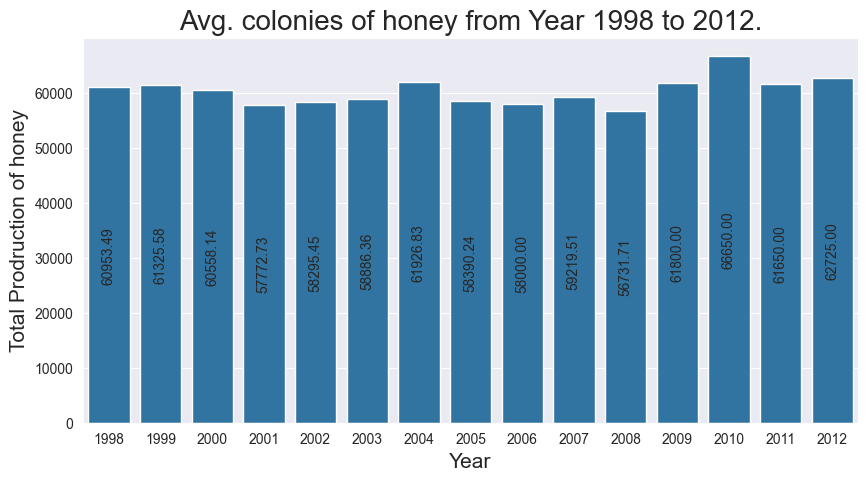

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df['year'],y=df['numcol'],estimator='mean',errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10,label_type='center', fmt='%.2f',rotation=90);
#df.groupby('year')['totalprod'].sum().plot(kind='bar')
plt.xlabel('Year',size=15)
plt.ylabel('Total Prodruction of honey',size=15)
plt.title('Avg. colonies of honey from Year 1998 to 2012.', size=20)
plt.show()

In [22]:
df['numcol'].mean()

60284.34504792332

- In the span of 1998 to 2012, there were approximately the same number of colonies with a small difference.
- if we compare in 2008 we had least colonies and in 2010 had the highest number of colonies

# Yield Per Colonies

### yieldpercol: Honey yield per colony

In [23]:
year_grpby_mean['yieldpercol'].describe()

count    15.000000
mean     61.872000
std       5.041152
min      53.850000
25%      57.725000
50%      62.550000
75%      65.135000
max      69.950000
Name: yieldpercol, dtype: float64

- Range of values for yield per colonies is  varies between 53 to 70 pound 
- Yield per colonies in each year is 62 pound approx., with deviation is 5pound.

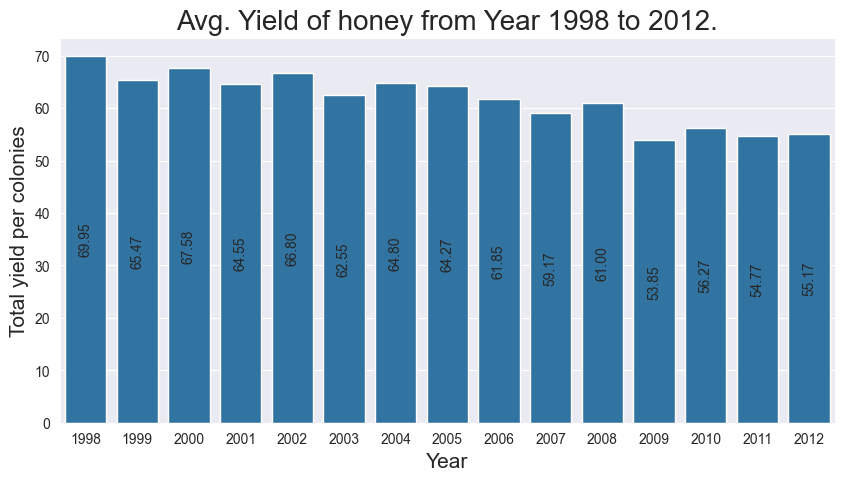

In [24]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df['year'],y=df['yieldpercol'],estimator='mean',errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10,label_type='center', fmt='%.2f',rotation=90);
plt.xlabel('Year',size=15)
plt.ylabel('Total yield per colonies',size=15)
plt.title('Avg. Yield of honey from Year 1998 to 2012.', size=20)
plt.show()

- The yield of honey decreased with the year, with a standard deviation of 5.


### 'Comapring Total production with consumption from Year 1998 to 2012.'

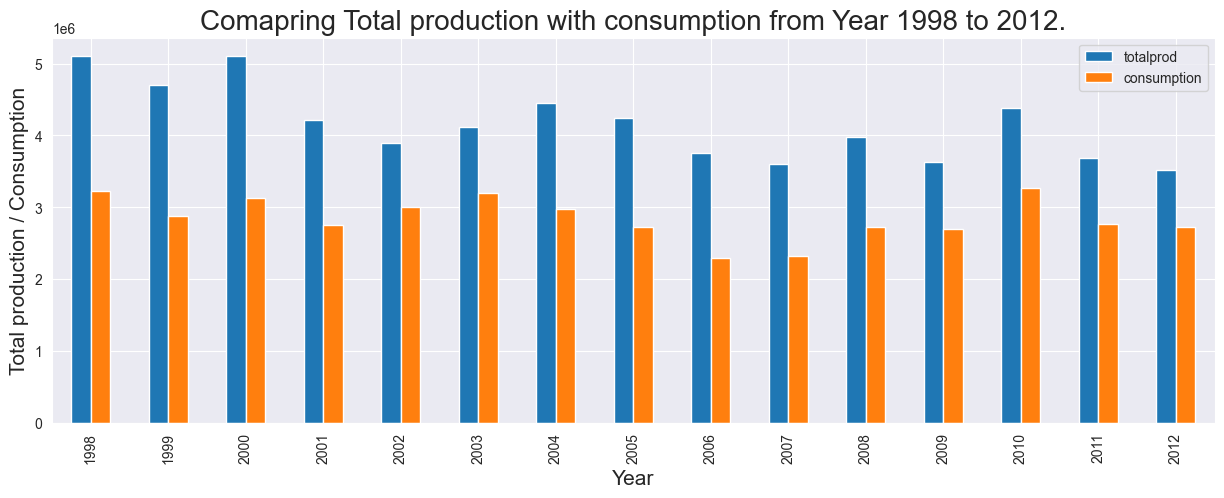

In [25]:
year_grpby_mean[['totalprod', 'consumption']].plot(kind='bar',figsize=(15,5),stacked=False)
plt.xlabel('Year',size=15)
plt.ylabel('Total production / Consumption',size=15)
plt.title('Comapring Total production with consumption from Year 1998 to 2012.', size=20)
plt.show()


# Percentage of Consumption  out of total Production

In [26]:
df_prodCon=year_grpby_sum[['totalprod', 'consumption','stocks']]
df_prodCon['%_cosumption']=100*(df_prodCon['consumption']/df_prodCon['totalprod'])
df_prodCon['%_stocks']=100*(df_prodCon['stocks']/df_prodCon['totalprod'])

df_prodCon

,totalprod,consumption,stocks,%_cosumption,%_stocks
year,,,,,
1998,219519000.0,138954000.0,80565000.0,63.299304,36.700696
1999,202387000.0,123997000.0,78390000.0,61.267275,38.732725
2000,219558000.0,134602000.0,84956000.0,61.305896,38.694104
2001,185748000.0,120984000.0,64764000.0,65.133407,34.866593
2002,171265000.0,132088000.0,39177000.0,77.124923,22.875077
2003,181372000.0,140753000.0,40619000.0,77.604592,22.395408
2004,182729000.0,121748000.0,60981000.0,66.627629,33.372371
2005,173969000.0,111782000.0,62187000.0,64.253976,35.746024
2006,154238000.0,94003000.0,60235000.0,60.946719,39.053281


- Out of total production approx 60-80% get consumed ,left over 20-40% stock is used for product making in each year.

# Year wise  Total Honey Prodcuction

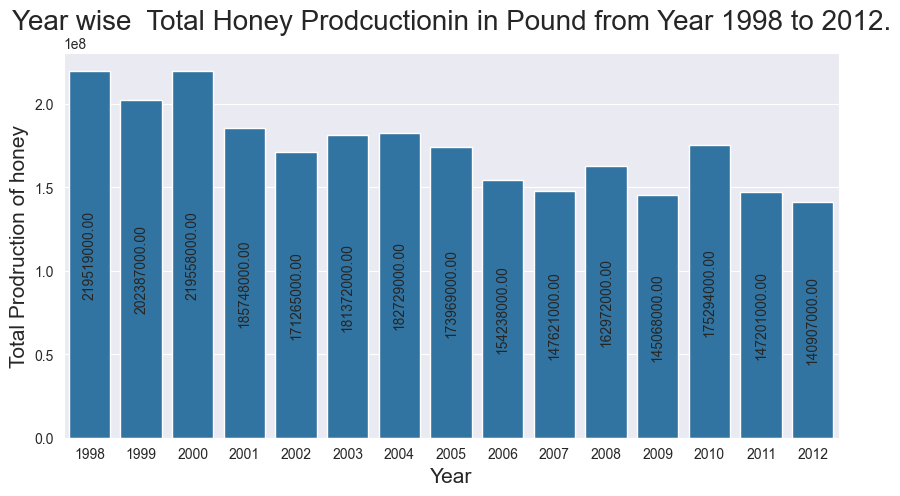

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df['year'],y=df['totalprod'],estimator='sum',errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10,label_type='center', fmt='%.2f',rotation=90);
#df.groupby('year')['totalprod'].sum().plot(kind='bar')
plt.xlabel('Year',size=15)
plt.ylabel('Total Prodruction of honey',size=15)
plt.title('Year wise  Total Honey Prodcuctionin in Pound from Year 1998 to 2012.', size=20)
plt.show()


In [28]:
year_totalprod = df.groupby('year')['totalprod'].sum().sort_values(ascending=False)
year_totalprod

year
2000    219558000.0
1998    219519000.0
1999    202387000.0
2001    185748000.0
2004    182729000.0
2003    181372000.0
2010    175294000.0
2005    173969000.0
2002    171265000.0
2008    162972000.0
2006    154238000.0
2007    147621000.0
2011    147201000.0
2009    145068000.0
2012    140907000.0
Name: totalprod, dtype: float64

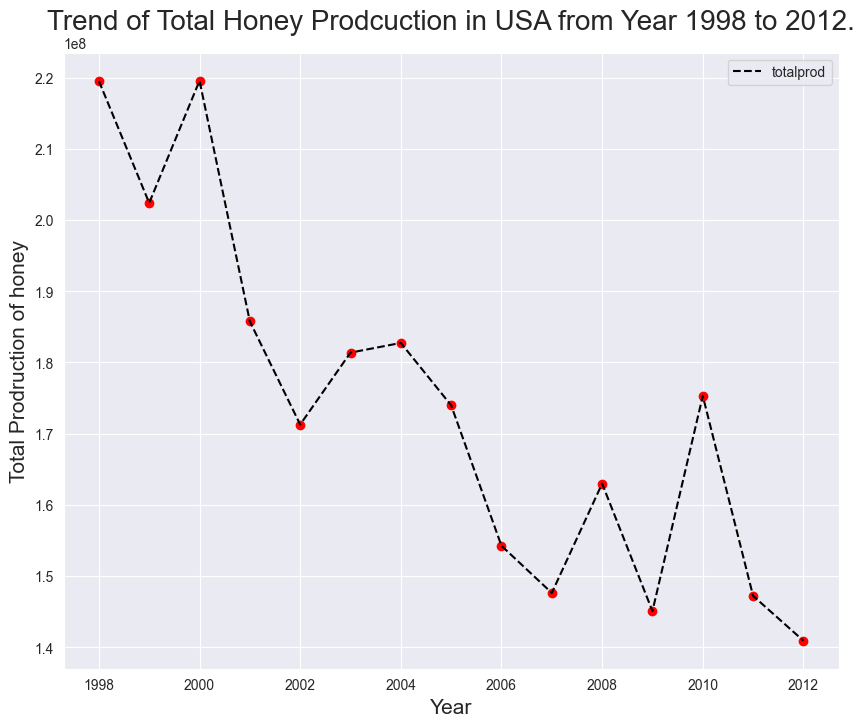

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
#sns.barplot(data=df,x='year',y='totalprod',estimator='sum')
df.groupby('year')['totalprod'].sum().plot(kind='line',style='--',color='k')
plt.scatter(y=year_totalprod,x=year_totalprod.index,color='red')
plt.xlabel('Year',size=15)
#plt.xlim(list(range(1998,2013)))
plt.ylabel('Total Prodruction of honey',size=15)
plt.title('Trend of Total Honey Prodcuction in USA from Year 1998 to 2012.', size=20)
plt.legend()
plt.show()

- From the graph, it is seen that the total honey production decreased with time from 1998 to 2000.

In [30]:
year_totalprod.astype(int)

year
2000    219558000
1998    219519000
1999    202387000
2001    185748000
2004    182729000
2003    181372000
2010    175294000
2005    173969000
2002    171265000
2008    162972000
2006    154238000
2007    147621000
2011    147201000
2009    145068000
2012    140907000
Name: totalprod, dtype: int32

In [31]:
year_totalprod.describe( ).astype(int)

count           15
mean     173989866
std       25480304
min      140907000
25%      150929500
50%      173969000
75%      184238500
max      219558000
Name: totalprod, dtype: int32

In [32]:
year_totalprod.mean()

173989866.66666666

- In 2000, the USA had the highest (219558000.0 lb) honey production among all; before 2000, 1998 was the highest honey (219519000.0 lb )production year.
- Ther is only 39000 lb diference in total honey prodction in yr 2000 and 1998.
- 2012 was the lowest honey production year, i.e., 140907000.0 lb.
- Average total honey proctuction from year 1998*- 2012 is 173989866.66 lb.

# Stocks of honey from Year 1998 to 2012

<Figure size 1000x500 with 0 Axes>

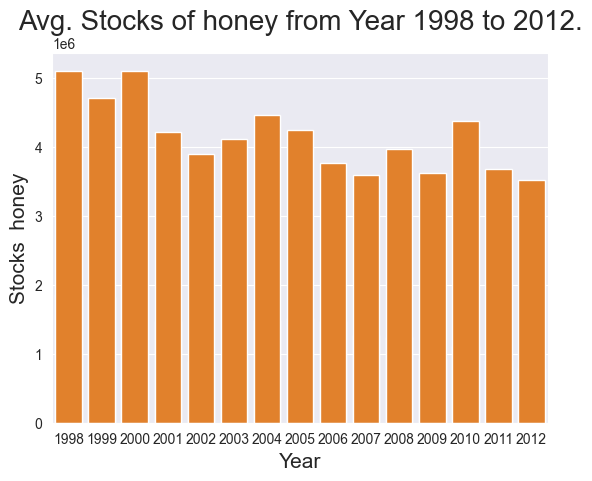

In [33]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots()
sns.barplot(data=df,x='year',y='stocks',errorbar=None,ax=ax)
sns.barplot(data=df,x='year',y='totalprod',errorbar=None,ax=ax)
#ax.bar_label(ax.containers[0], fontsize=10,label_type='center', fmt='%.2f',rotation=90);
plt.xlabel('Year',size=15)
plt.ylabel('Stocks  honey',size=15)
plt.title('Avg. Stocks of honey from Year 1998 to 2012.', size=20)

plt.show()

# Price Per Pounds

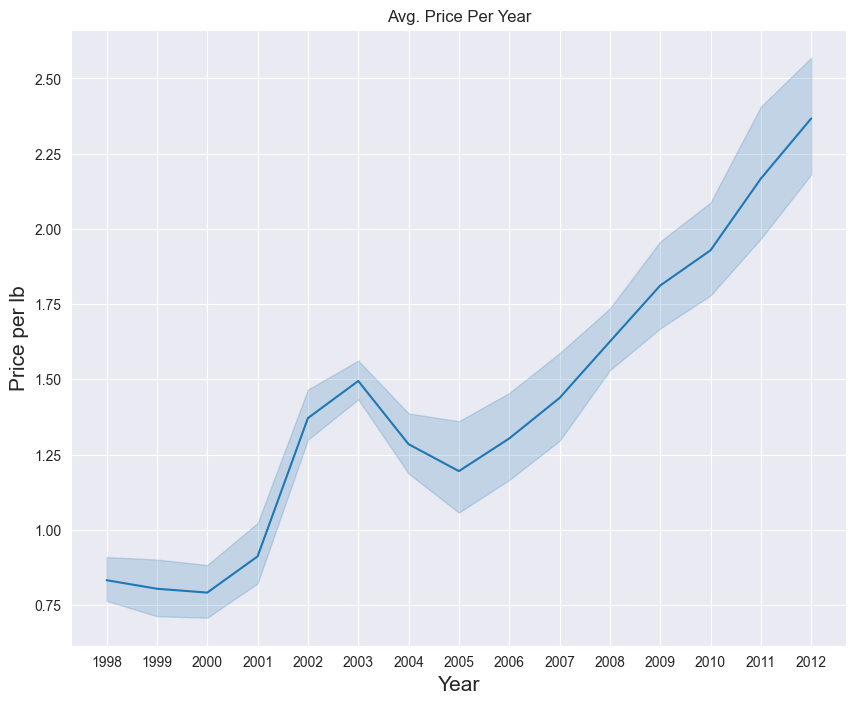

In [34]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='year',y='priceperlb')

plt.xlabel('Year',size=15)
plt.xticks(list(range(1998,2013)))
plt.ylabel('Price per lb',size=15)
plt.title('Avg. Price Per Year')
plt.show()

- honey Price per pounds is increases with time in the given span

# Product Value with year-wise comparision

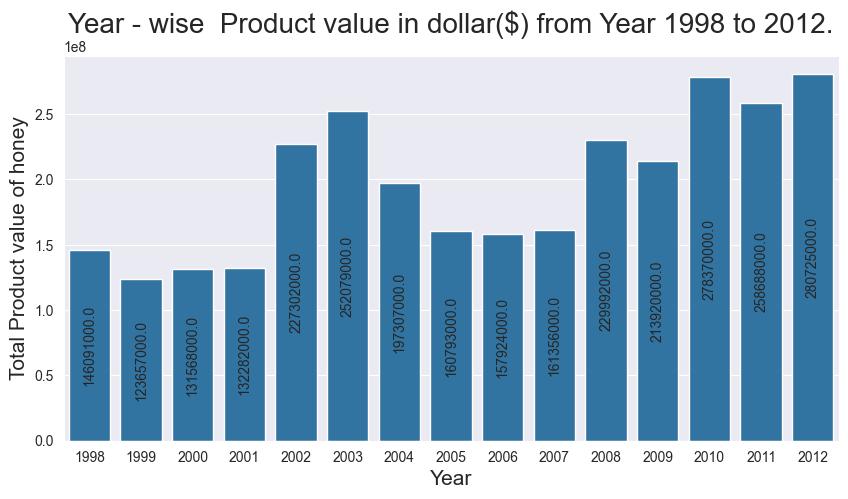

In [35]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df['year'],y=df['prodvalue'],estimator='sum',errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10,label_type='center', fmt='%.1f',rotation=90);
#df.groupby('year')['totalprod'].sum().plot(kind='bar')
plt.xlabel('Year',size=15)
plt.ylabel('Total Product value of honey',size=15)
plt.title('Year - wise  Product value in dollar($) from Year 1998 to 2012.', size=20)
plt.show()

In [36]:
year_prodvalue = df.groupby('year')['prodvalue'].sum().sort_values(ascending=False)

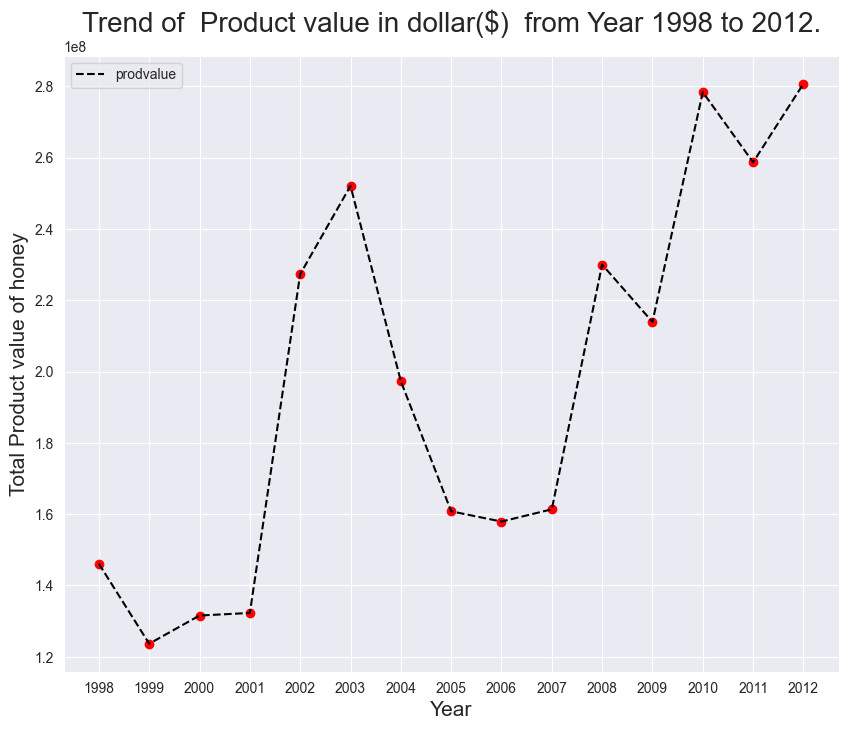

In [37]:
plt.figure(figsize=(10,8))
#sns.barplot(data=df,x='year',y='totalprod',estimator='sum')
df.groupby('year')['prodvalue'].sum().plot(kind='line',style='--',color='k')
plt.scatter(y=year_prodvalue,x=year_prodvalue.index,color='red')
plt.xlabel('Year',size=15)
plt.xticks(list(range(1998,2013)))
plt.ylabel('Total Product value of honey',size=15)
plt.title('Trend of  Product value in dollar($)  from Year 1998 to 2012.', size=20)
plt.legend()
plt.show()

In [38]:
year_prodvalue 

year
2012    280725000.0
2010    278370000.0
2011    258688000.0
2003    252079000.0
2008    229992000.0
2002    227302000.0
2009    213920000.0
2004    197307000.0
2007    161356000.0
2005    160793000.0
2006    157924000.0
1998    146091000.0
2001    132282000.0
2000    131568000.0
1999    123657000.0
Name: prodvalue, dtype: float64

In [39]:
year_prodvalue.describe().astype(int)

count           15
mean     196803600
std       55620915
min      123657000
25%      152007500
50%      197307000
75%      241035500
max      280725000
Name: prodvalue, dtype: int32

- The product value of honey had the highest value in 2012, despite the lowest total honey production in 2012.
- In 1999, honey had the lowest product value.
- In 2000-01, there was an almost equal product value; after 2001, there was a sudden increase in the value of the product up to 2003.
- After 2003, there was a sudden drop in product value; from 2005–2007, it had an almost similar product value.
- Again, after 2007, there was an increasing trend in product value.

# state

In [40]:
df['state_name'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [41]:
df['state'].nunique()

44

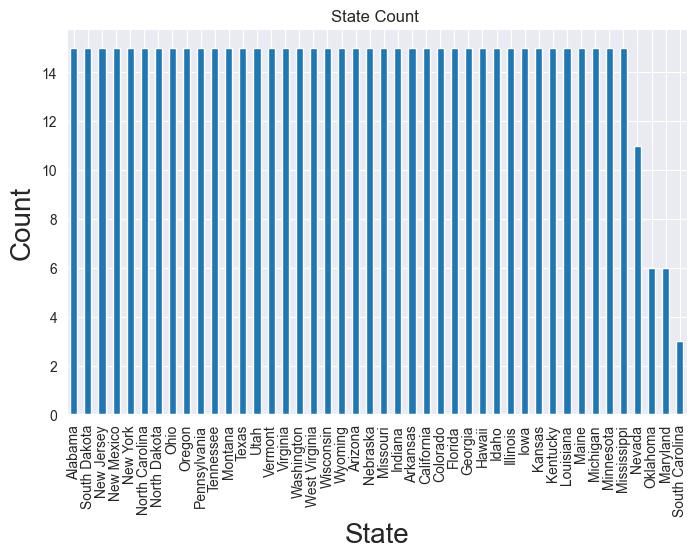

In [42]:
plt.figure(figsize=(8,5))
df['state_name'].value_counts().plot(kind='bar',title='State Count ')
plt.ylabel('Count',size=20)
plt.xlabel('State',size=20)
plt.show()

# State wise Total Honey Prodcuction

In [43]:
state_totalprod= state_name_grpby_sum['totalprod'].sort_values(ascending=False)
state_totalprod.head()

state_name
North Dakota    475085000.0
California      347535000.0
South Dakota    266141000.0
Florida         247048000.0
Montana         156562000.0
Name: totalprod, dtype: float64

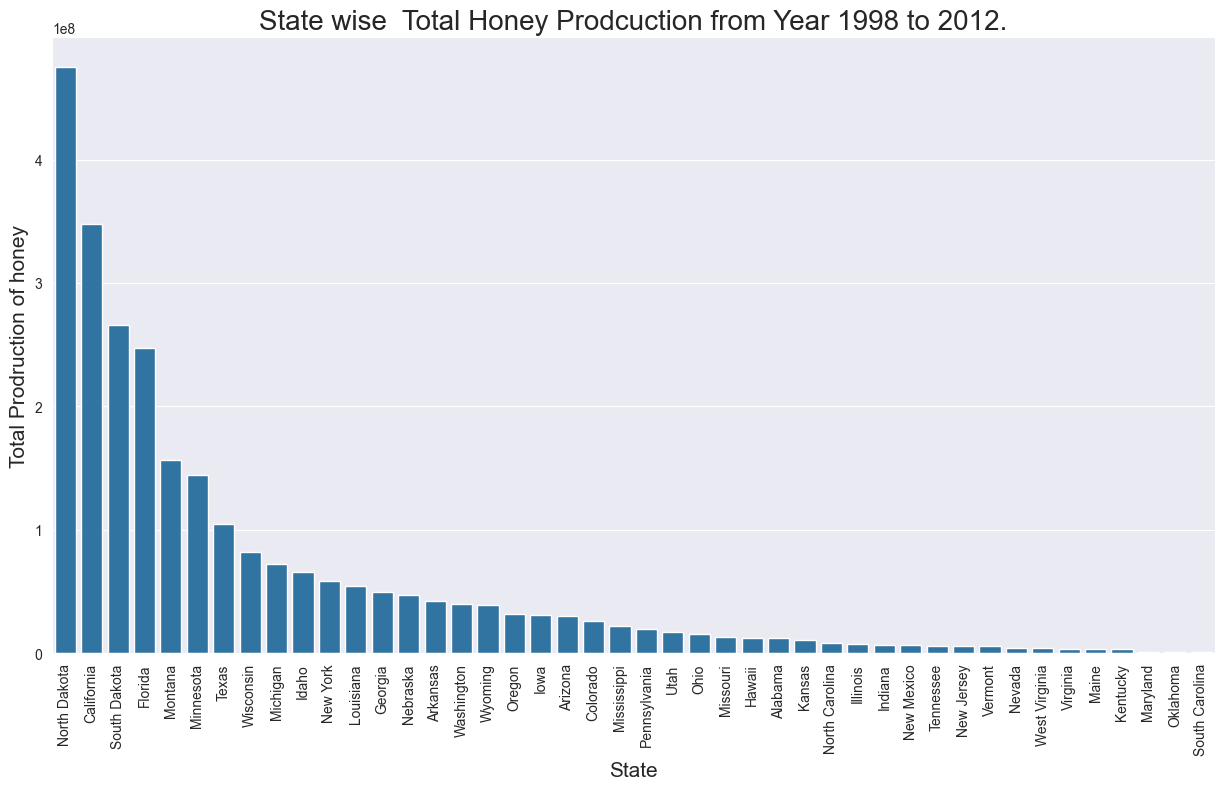

In [44]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x=df['state_name'],y=df['totalprod'],estimator='sum',errorbar=None,order=state_totalprod.index)
#ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f',rotation=90);
#df.groupby('year')['totalprod'].sum().plot(kind='bar')
plt.xlabel('State',size=15)
plt.ylabel('Total Prodruction of honey',size=15)
plt.xticks(rotation=90)
plt.title('State wise  Total Honey Prodcuction from Year 1998 to 2012.', size=20)
plt.show()


In [45]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'state_name', 'consumption'],
      dtype='object')

### 1. In which year we have Highest Honey Total honey Production and how much

In [46]:
year_grpby_sum.sort_values(['totalprod'],ascending=False)['totalprod'].head(1)

year
2000    219558000.0
Name: totalprod, dtype: float64

- year 2000 has the highest Total Honey Production

### 2. In which year we have least Honey Total honey Production

In [47]:
year_grpby_sum.sort_values(['totalprod'],ascending=False)['totalprod'].tail(1)

year
2012    140907000.0
Name: totalprod, dtype: float64

- year 2012 has the least Total Honey Production

### 3. Year 2000 which state has highest total honey production

In [48]:
df[df['year']==2000][['totalprod','state_name']].max()

totalprod     34500000.0
state_name       Wyoming
dtype: object

### 4. list of states in year 2000 which state has lowest  total honey production than mean

In [49]:
df['totalprod'].mean()

4169086.2619808307

In [50]:
df.loc[(df['year']==2000) &  (df['totalprod'] < df['totalprod'].mean())]['state_name'].values

array(['Alabama', 'Arizona', 'Colorado', 'Georgia', 'Hawaii', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Mississippi', 'Missouri', 'Nevada', 'New Jersey',
       'New Mexico', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wyoming'], dtype=object)

### 5. Top 5 State in  USA have the highest Total Honey Production

In [51]:
state_totalprod.head()

state_name
North Dakota    475085000.0
California      347535000.0
South Dakota    266141000.0
Florida         247048000.0
Montana         156562000.0
Name: totalprod, dtype: float64

- ND- North Dakota
- CA- California
- SD- South Dakota
- FL- Florida
- MT- Montana

### 6.   5 State in USA have Lowest Total Honey Production

In [52]:
state_totalprod.tail()

state_name
Maine             3701000.0
Kentucky          3445000.0
Maryland          1266000.0
Oklahoma          1207000.0
South Carolina    1030000.0
Name: totalprod, dtype: float64

- ME-  Maine
- KY- Kentucky
- MD-  Maryland
- OK- Oklahoma
- SC- South Carolina

In [53]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'state_name', 'consumption'],
      dtype='object')

### 7. Top 5 State in USA have the highest Number of Colonies

In [54]:
state_prodvalue= state_name_grpby_sum['numcol'].sort_values(ascending=False)
state_prodvalue.head()

state_name
California      6100000.0
North Dakota    5555000.0
South Dakota    3544000.0
Florida         2928000.0
Montana         2040000.0
Name: numcol, dtype: float64

### 8.  5 State in USA have Lowest Number of Colonies

In [55]:
state_name_grpby_sum['numcol'].sort_values(ascending=False).tail()

state_name
Vermont           85000.0
Kentucky          66000.0
Maryland          28000.0
Oklahoma          27000.0
South Carolina    16000.0
Name: numcol, dtype: float64

### 9. Top 5 State in USA have the highest Product Value

In [186]:
state_priceperlb= state_name_grpby_mean['prodvalue'].sort_values(ascending=False)
state_priceperlb.head()

state_name
North Dakota    36376133.33
California      24359333.33
South Dakota    19376733.33
Florida         16615266.67
Montana         11793533.33
Name: prodvalue, dtype: float64

### 10. Top 5 State in USA have the lowest Product Value

In [187]:
state_priceperlb.tail()

state_name
Kentucky          479933.33
South Carolina    446000.00
Maine             337800.00
Maryland          305500.00
Oklahoma          285166.67
Name: prodvalue, dtype: float64

### 11. In the Span of 1998-2012 which state produce highest total honey Production

In [195]:
state_name_grpby_sum['totalprod'].sort_values(ascending=False).head(1)

state_name
North Dakota    475085000.0
Name: totalprod, dtype: float64

### 12. Price per Pound Trend over the given Span

<Axes: xlabel='year', ylabel='priceperlb'>

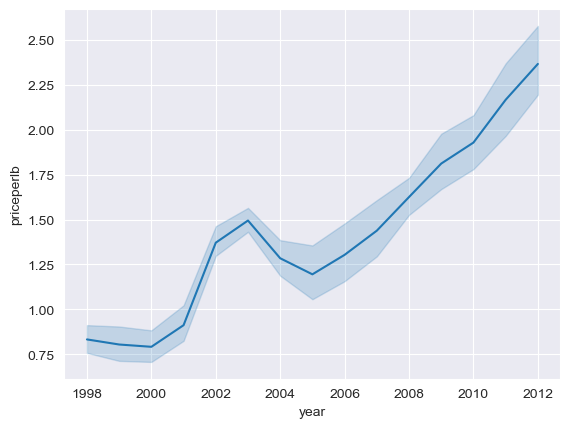

In [196]:
sns.lineplot(data=df,x='year',y='priceperlb')

- Trends show an upward trend, which means the price per pound of honey increased year by year.

### 13. Which State has Highest Honey Consumption in 2012

In [219]:
df[df['year']==2012][['state_name','consumption']].sort_values('consumption',ascending=False).iloc[0,]

state_name     North Dakota
consumption      27158000.0
Name: 612, dtype: object

### 14. Which State has Highest Honey Consumption in 1998

In [221]:
df[df['year']==1998][['state_name','consumption']].sort_values('consumption',ascending=False).iloc[0,]

state_name     California
consumption    25024000.0
Name: 3, dtype: object